In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, r2_score
#

In [ ]:
#===============================================================================
#                Cargar Archivos
#===============================================================================

Ruta_Arch = "../../vehicles.csv"

total_data= pd.read_csv(Ruta_Arch, sep = ",")


           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [7]:
print(total_data.head(25))



            id                                                url  \
0   7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1   7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2   7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3   7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4   7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5   7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6   7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7   7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8   7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9   7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   
10  7218893038  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
11  7218325704  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
12  7217788283  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
13  7217147606  https://elpaso.cra

In [5]:
print(total_data.info())
print(total_data.columns)
print(total_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### LAs Varible Numericas detectadas son:


 4   price         426880 non-null  int64

 5   year          425675 non-null  float64

 11  odometer      422480 non-null  float64

 21  county        0 non-null       float64

 23  lat           420331 non-null  float64

 24  long          420331 non-null  float64


### Se obtiene como primera conclusion que:
 

In [ ]:
### El "Price" que es nuestra Variable Objetivo no presenta Registros Nulos.

### "year" del Vehiculo el cual, tentativamente debe ser uno  de nuestros Valores Principales, presenta Valores Nulos.

### odometer Un odómetro es un instrumento que mide la distancia total recorrida por un vehículo asi que me interesa ver que valor esta registrado alli ya que es una Variable Numerica

### Por Ahora LAtitud y Longitud, si bien nos indican la coordenada donde se encuentra el Vehiculo tentativamente presenta mayor Granularidad que la Variable Categorica "region" que indica Zonas mas aplias en un Solo Dato

In [10]:
print(total_data['odometer'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
426875    32226.0
426876    12029.0
426877     4174.0
426878    30112.0
426879    22716.0
Name: odometer, Length: 426880, dtype: float64


Por lo observado, presenta el Kilometraje del Vehiculo, pero Tiene Valores Nullos, esto es importante porque es una de las Variables que determina el uso y en Consecuencia el Valor del Vehiculo

In [14]:
#Variable Númericas Importantes
Campoos = ['price', 'year', 'odometer']

# Hacer describe y redondear a 2 decimales solo para esas columnas
resumen = total_data[Campoos].describe().round(2)

# Mostrar el resumen
print(resumen)

              price       year     odometer
count  4.268800e+05  425675.00    422480.00
mean   7.519903e+04    2011.24     98043.33
std    1.218228e+07       9.45    213881.50
min    0.000000e+00    1900.00         0.00
25%    5.900000e+03    2008.00     37704.00
50%    1.395000e+04    2013.00     85548.00
75%    2.648575e+04    2017.00    133542.50
max    3.736929e+09    2022.00  10000000.00


In [76]:
#===============================================================================
#                Detectar Outliners
#===============================================================================
# Detectar outliers usando el método IQR
outliers = {}

for columna in Campoos:
    Q1 = total_data[columna].quantile(0.25)
    Q3 = total_data[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.8 * IQR
    outlier_indices = total_data[(total_data[columna] < lower_bound) | (total_data[columna] > upper_bound)].index
    outliers[columna] = len(outlier_indices)
    print(f"'{columna}': {len(outlier_indices)} outliers detectados.")

'price': 5528 outliers detectados.
'year': 15896 outliers detectados.
'odometer': 2884 outliers detectados.


In [78]:
#===============================================================================
#                Missing Data Ceros, N/A
#===============================================================================
# Count NaN
total_data.isnull().sum().sort_values(ascending=False)


county          426880
size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
lat               6549
long              6549
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
description         70
posting_date        68
image_url           68
region_url           0
url                  0
id                   0
region               0
price                0
state                0
dtype: int64

### Esta seccion se dedica a estudiar las variable

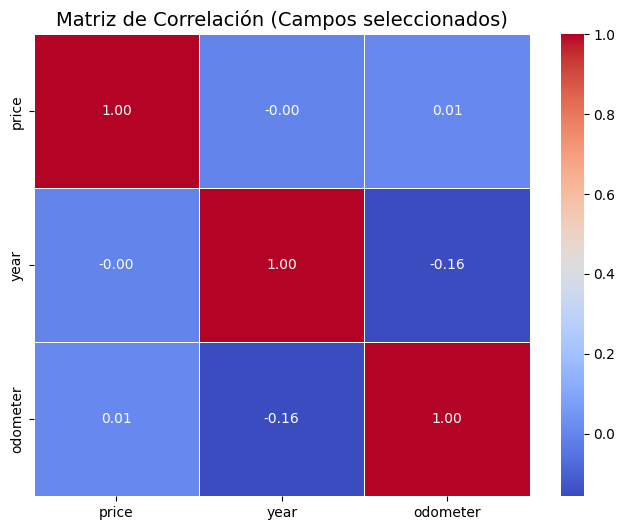

In [79]:
data_filtrada = total_data[Campoos]

plt.figure(figsize=(8, 6))
sns.heatmap(data_filtrada.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación (Campos seleccionados)', fontsize=14)
plt.show()

### Tentativamente se observa muy baja Correlacion entre "price" y las Variables "year" y "odometer" .  Una vez hecha la limpieza de los Datos que observamos (ceros, Nulls) Volveremos a observar las correlaciones.

In [80]:

#total_data2 = total_data.drop_duplicates()
total_data2=total_data.copy()

In [81]:
# Hemos Observado que la Columna Country esta vacia.
# Url y region_url son las direcciones Web donde se publicitan los Vehiculos.
# Por lo explicado previamente, Latitud y Longitud tambien Vana  ser retiradas.
# id vaa ser retirada para que no afecte las relaciones. 
# La columna "image_url" es solo una imagen por lo que vamos a Eliminarla
col_drop = ['county', 'id', 'url', 'region_url', 'lat', 'long', 'image_url' ]
total_data2.drop(columns=col_drop, inplace=True)
total_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  description   426810 non-null  object 
 17  state         426880 non-null  object 
 18  post

In [82]:
print(total_data2.info())
print(total_data2.columns)
print(total_data2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  description   426810 non-null  object 
 17  state         426880 non-null  object 
 18  post

## Me intereza Estudiar el contenido especifico de las Variable Predictoras, en partucular las queestan presentando menor número de Non-Null 

In [83]:
porcentajes = (total_data['VIN'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)

VIN
1FMJU1JT1HEA52352     0.1%
3C6JR6DT3KG560649    0.09%
1FTER1EH1LLA36301    0.09%
5TFTX4CN3EX042751    0.09%
1GCHTCE37G1186784    0.08%
                     ...  
56ZL1UJ20KP000149     0.0%
2A8GF68446R882658     0.0%
2HGES15535H620534     0.0%
1FDWF37P64EA24868     0.0%
5XXGN4A73FG370482     0.0%
Name: proportion, Length: 118264, dtype: object


In [84]:
porcentajes = (total_data['drive'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)

drive
4wd    44.52%
fwd    35.61%
rwd    19.87%
Name: proportion, dtype: object


In [85]:
porcentajes = (total_data['size'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)

size
full-size      52.66%
mid-size       28.61%
compact        16.08%
sub-compact     2.65%
Name: proportion, dtype: object


In [86]:
porcentajes = (total_data['type'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)

type
sedan          26.06%
SUV            23.14%
pickup         13.03%
truck          10.56%
other           6.62%
coupe           5.75%
hatchback       4.97%
wagon           3.22%
van             2.56%
convertible     2.31%
mini-van        1.44%
offroad         0.18%
bus             0.15%
Name: proportion, dtype: object


In [ ]:
round(total_data[Campoos].describe(),2)

NameError: name 'Campoos' is not defined

In [87]:
porcentajes = (total_data['manufacturer'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)

manufacturer
ford               17.35%
chevrolet          13.46%
toyota              8.36%
honda                5.2%
nissan              4.66%
jeep                4.65%
ram                 4.48%
gmc                  4.1%
bmw                 3.59%
dodge               3.35%
mercedes-benz       2.89%
hyundai             2.53%
subaru              2.32%
volkswagen          2.28%
kia                 2.07%
lexus                2.0%
audi                1.85%
cadillac             1.7%
chrysler            1.47%
acura               1.46%
buick               1.34%
mazda               1.33%
infiniti            1.17%
lincoln             1.03%
volvo               0.82%
mitsubishi           0.8%
mini                0.58%
pontiac             0.56%
rover               0.52%
jaguar              0.48%
porsche             0.34%
mercury             0.29%
saturn              0.27%
alfa-romeo          0.22%
tesla               0.21%
fiat                0.19%
harley-davidson     0.04%
ferrari             0.02%

In [89]:
porcentajes = (total_data['condition'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)     

condition
good         48.05%
excellent    40.14%
like new      8.38%
fair          2.68%
new           0.52%
salvage       0.24%
Name: proportion, dtype: object


In [90]:
porcentajes = (total_data['cylinders'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)     
     

cylinders
6 cylinders     37.79%
4 cylinders     31.16%
8 cylinders     28.92%
5 cylinders      0.69%
10 cylinders     0.58%
other            0.52%
3 cylinders      0.26%
12 cylinders     0.08%
Name: proportion, dtype: object


In [91]:
porcentajes = (total_data['title_status'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)     

title_status
clean         96.77%
rebuilt        1.72%
salvage        0.92%
lien           0.34%
missing        0.19%
parts only     0.05%
Name: proportion, dtype: object


In [92]:
porcentajes = (total_data['paint_color'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)    

paint_color
white     26.72%
black     21.19%
silver    14.48%
blue      10.52%
red       10.27%
grey       8.23%
green      2.48%
custom     2.26%
brown      2.22%
yellow     0.72%
orange     0.67%
purple     0.23%
Name: proportion, dtype: object


In [93]:
porcentajes = (total_data['fuel'].value_counts(normalize=True) * 100).round(2)
porcentajes_con_signo = porcentajes.astype(str) + '%'
print(porcentajes_con_signo)   

fuel
gas         84.04%
other        7.25%
diesel       7.09%
hybrid       1.22%
electric      0.4%
Name: proportion, dtype: object


### Los campos VIN Todos los Elemntos son Unicos y no representan una Caracteristica que determine el Valor, por otro lado Description es la narracion del Producto (El Vehiculo) y es apreciativa y en muchos casos se repite.  Por lo que estas dos columnas Van a ser eliminadas.

In [94]:
col_drop2 = ['VIN', 'description','size' ,'posting_date']
total_data2.drop(columns=col_drop2, inplace=True)
total_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


###   Eliminando los Elemntos Null en los campos Seleccionados.
###  Sin embargo, si lo aplocamos directamente en este momento.   Podriamos Perde, tomando el peor caso, Cylinder, perderiamos el 42% de la data que poseemos actualmente.

condition     252776 non-null  object 

cylinders     249202 non-null  object 

drive         296313 non-null  object 

type          334022 non-null  object 

paint_color   296677 non-null  object

### Por lo que eliminariamos condition, cylinders



In [95]:
col_drop2 = ['condition', 'cylinders']
total_data2.drop(columns=col_drop2, inplace=True)
total_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
 12  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [96]:
total_data3=total_data2.copy()

In [97]:
total_data3 = total_data2.dropna()
total_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205777 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        205777 non-null  object 
 1   price         205777 non-null  int64  
 2   year          205777 non-null  float64
 3   manufacturer  205777 non-null  object 
 4   model         205777 non-null  object 
 5   fuel          205777 non-null  object 
 6   odometer      205777 non-null  float64
 7   title_status  205777 non-null  object 
 8   transmission  205777 non-null  object 
 9   drive         205777 non-null  object 
 10  type          205777 non-null  object 
 11  paint_color   205777 non-null  object 
 12  state         205777 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 22.0+ MB


### En esta Reduccion producida por la Eliminacion de los Null, hemos perdido 56% de la data.  Por lo que una eliminacion directa de los Campos, no es recomendable.  Esto Fue sobre total_data3.   Asi que la Variable Total_data2 aun contiene los datos.

In [98]:
#===============================================================================
#            Missing Data Ceros, Revicion de campos con MAyores Valores Ceros
#===============================================================================
# Count NaN
total_data2.isnull().sum().sort_values(ascending=False)

drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
region               0
price                0
state                0
dtype: int64

In [99]:
#===============================================================================
#        Esta Grafica me permite ver a donde se mueven los Datos
#                       Datos Categórico
#===============================================================================
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(4, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "region")
sns.histplot(ax = axis[0,1], data = total_data, x = "price")
sns.histplot(ax = axis[0,2], data = total_data, x = "year")
sns.histplot(ax = axis[1,0], data = total_data, x = "manofacturer")
sns.histplot(ax = axis[1,1], data = total_data, x = "model")
sns.histplot(ax = axis[1,2], data = total_data, x = "fuel")
sns.histplot(ax = axis[2,0], data = total_data, x = "odometer")
sns.histplot(ax = axis[2,1], data = total_data, x = "title_status")
sns.histplot(ax = axis[2,2], data = total_data, x = "transmission  ")
sns.histplot(ax = axis[3,0], data = total_data, x = "drive")
sns.histplot(ax = axis[3,1], data = total_data, x = "type")
sns.histplot(ax = axis[3,2], data = total_data, x = "paint_color")
sns.histplot(ax = axis[4,0], data = total_data, x = "state")

fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

: 

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(numeric_cols)
print(categorical_cols)

In [27]:
#===============================================================================
#                Funciones par Eliminar Outliners
#===============================================================================


def Eliminar_Outliner(Data_frame01, columnas):
    Q1 = Data_frame01[columnas].quantile(0.25)
    Q3 = Data_frame01[columnas].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.8 * IQR
    
    # Filtrar los datos que están dentro de los límites
    Data_frame_filtrado = Data_frame01[
        (Data_frame01[columnas] >= lower_bound) & (Data_frame01[columnas] <= upper_bound)
    ]
    
    return Data_frame_filtrado


#===============================================================================
#                Eliminar Outliners
#===============================================================================
# Copia del DataFrame para no tocar el original


total_data_sin_outliers = total_data2.copy()
for valor in Campoos:
    print('bloqueado')
    #total_data_sin_outliers = Eliminar_Outliner(total_data_sin_outliers, valor)
print(f"Nuevo tamaño del DataFrame: {total_data_sin_outliers.shape}")


NameError: name 'total_data2' is not defined

### 📊 Comparación Rápida: Pearson vs Spearman

| Característica              | `df.corr()` (Pearson)               | `spearmanr()` (Spearman)               |
|----------------------------|--------------------------------------|----------------------------------------|
| **Tipo de correlación**    | Lineal                               | Monótona (según rangos)                |
| **Sensibilidad a outliers**| Alta                                 | Baja                                   |
| **Requiere distribución normal** | Sí (idealmente)                   | No                                     |
| **Devuelve**               | Matriz de correlación                | Valor único (coeficiente y p-valor)    |
| **Soporte en Pandas**      | Sí (`.corr()`)                       | No (usa `scipy.stats.spearmanr`)       |
| **Manejo de NaNs**         | Necesita `.dropna()`                 | También requiere sin NaNs              |
| **Ideal para**             | Relaciones lineales y limpias        | Relaciones no lineales o con outliers  |

### ✅ Recomendación
- Usa **Pearson** si esperas una relación **lineal** y tus datos están **limpios y normalmente distribuidos**.
- Usa **Spearman** si esperas una relación **monótona** (pero no necesariamente lineal), o si los datos tienen **outliers** o no siguen una distribución normal.


In [ ]:
from scipy.stats import skew, kurtosis

skewness = skew(total_data3['year'].dropna())
kurt = kurtosis(total_data3['year'].dropna())

print(f"Asimetría (skew): {skewness:.2f}")
print(f"Curtosis: {kurt:.2f}")